In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import log as ln
import random
from numba import jit
from numpy import random
import math
from matplotlib.pyplot import plot,savefig
import sys
filePath = '../Utils/nup'
sys.path.append(filePath)
import os
from functions import relu,drelu,softmax,divi_,mini_batch_generate,sigmoid,dsigmoid,turn_2_zero,scale,tanh,dtanh
from optimizers import Adam
from model_save import model_save

## Fig3a

In [4]:
p=70
def l2_f(x,p):
    x1=x
    if x1.shape[0]!=p or x1.shape[0] == x1.shape[1]:
        x1 = x.T
    l2 = np.sqrt(np.sum(x1**2,axis=1))
    return l2.reshape(p,1)
def l2judge(x1,x2,p,sig):
    p1 = l2_f(x1,p)
    p2 = l2_f(x2,p)
    up = (p1+p2)
    return np.abs(up*(np.average(np.abs(sig))/np.average(np.abs(p1+p2))))+np.abs((sig).reshape(p,1))
def calculate(mod1,l=1):
    test31 = mod1.Sigma[l]
    test11 = l2_f(mod1.xi1[l],p)
    test21 = l2_f(mod1.xi2[l],p)

    index = l2judge(mod1.xi1[l],mod1.xi2[l],p,mod1.Sigma[l])
    sor_index = np.argsort(index.T)
    p_num=p
    test1x = np.zeros((100,p_num))
    test2x = np.zeros((p_num,100))
    test3x = np.zeros((p_num,1))
    test4x = np.zeros((p_num,1))
    for j in range(p_num):
        test1x[:,j] = mod1.xi1[l][:,int(sor_index.T[-(j+1)])]
        test2x[j] = mod1.xi2[l][sor_index.T[-(j+1)]]
        test3x[j] = mod1.Sigma[l][sor_index.T[-(j+1)]]
        
        
    print((np.average(np.abs(test31))/np.average(np.abs(test11+test21))))
    test3 = np.abs(test3x)
    test1 = l2_f(test1x,p_num)*(np.average(np.abs(test31))/np.average(np.abs(test11+test21)))
    test2 = l2_f(test2x,p_num)*(np.average(np.abs(test31))/np.average(np.abs(test11+test21)))
    test4 = test1+test2+test3
    print(test2)
    print(test1)
    print((test3))
    return test1,test2,test3,test4
tes1=[]
tes2 = []
tes3 = []
tes4 = []
for i in range(5):
    mod1=model## use model_save to load the pre-saved model
    x1,x2,x3,x4=calculate(mod1,l=0)
    tes1.append(x1*1)
    tes2.append(x2*1)
    tes3.append(x3*1)
    tes4.append(x4*1)
tes1_mean = np.average(tes1,axis=0)
tes1_std = np.std(tes1,axis=0,ddof=1)
tes2_mean = np.average(tes2,axis=0)
tes2_std = np.std(tes2,axis=0,ddof=1)
tes3_mean= np.average(tes3,axis=0)
tes3_std = np.std(tes3,axis=0,ddof=1)
tes4_mean= np.average(tes4,axis=0)
tes4_std = np.std(tes4,axis=0,ddof=1)

tes4_mean_log= np.average(ln(tes4),axis=0)
tes4_std_log = np.std(ln(tes4),axis=0,ddof=1)

ValueError: could not broadcast input array from shape (784,) into shape (100,)

In [8]:
num=10
z1 = np.polyfit(ln(x[0:num]), ln(tes4_mean[0:num]), 1)
# plt.plot(ln(x[num:70]),ln(tes4_mean[num:70]))
# plt.plot(ln(x[num:70]),z2[0]*ln(x[num:70])+z2[1])

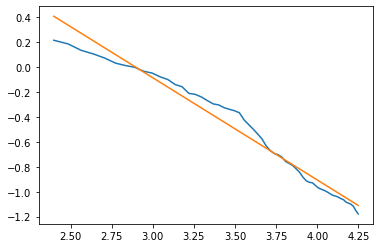

In [9]:
num=10
z2 = np.polyfit(ln(x[num:70]), ln(tes4_mean[num:70]), 1)
plt.plot(ln(x[num:70]),ln(tes4_mean[num:70]))
plt.plot(ln(x[num:70]),z2[0]*ln(x[num:70])+z2[1])

<ipython-input-10-40689c496bf7>:27: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax2.set_ylim(0,(2.4))


Text(2.0, 0.5, 'slope$\\approx$-0.82')

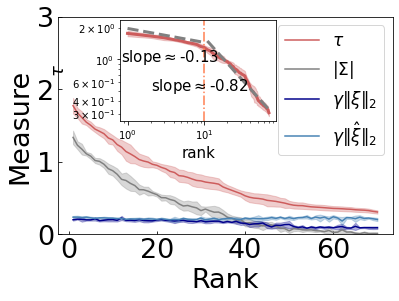

In [10]:
x = np.linspace(1,70,70)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,tes4_mean,color = "indianred",label = r"$\tau$")
ax.fill_between(x,np.squeeze(tes4_mean-tes4_std),np.squeeze(tes4_mean+tes4_std),color = "indianred",alpha=0.3)
ax.plot(x,tes3_mean,color = "grey",label =r"$|\Sigma|$")
ax.fill_between(x,np.squeeze(tes3_mean-tes3_std),np.squeeze(tes3_mean+tes3_std),color = "grey",alpha=0.3)

ax.plot(x,tes1_mean,color = "darkblue",label =r"$\gamma\Vert\xi\Vert_2$")
ax.fill_between(x,np.squeeze(tes1_mean-tes1_std),np.squeeze(tes1_mean+tes1_std),color = "darkblue",alpha=0.3)

ax.plot(x,tes2_mean,color = "steelblue",label =r"$\gamma\Vert\hat{\xi}\Vert_2$")
ax.fill_between(x,np.squeeze(tes2_mean-tes2_std),np.squeeze(tes2_mean+tes2_std),color = "steelblue",alpha=0.3)
ax.legend(fontsize=17,loc = 'upper right')
ax.set_ylim(0,3.0)
ax.tick_params(labelsize=27,direction='in')
ax.set_xlabel("Rank",fontsize=27)
ax.set_ylabel("Measure",fontsize=27)
ax2 = plt.axes([0.27, 0.52, 0.36, 0.35])
ax2.set_ylabel(r"$\tau$",fontsize=18)
ax2.loglog(x,tes4_mean,color='indianred',linewidth = 3.0)
# # ax2.plot(ln(x),ln(tes4_mean),color='indianred')
ax2.fill_between((x),np.squeeze(tes4_mean-tes4_std),np.squeeze(tes4_mean+tes4_std),color = "indianred",alpha=0.3)
ax2.plot(np.exp(ln(x[0:10])),np.exp(z1[0]*(ln(x[0:10]))+z1[1]+0.08),color = 'grey',linestyle='--',linewidth = 3.0)
ax2.plot(np.exp(ln(x[10:70])),np.exp(z2[0]*(ln(x[10:70]))+z2[1]+0.00),color = 'grey',linestyle='--',linewidth = 3.0)
ax2.set_xlabel("rank",fontsize=15)
ax2.set_ylim(0,(2.4))
ax2.axvline(x = (10), linestyle="-.", color='coral')
ax2.text(0.83, 0.95, r'slope$\approx$'+str(round(float(z1[0]),2)),fontsize=15)
ax2.text(2.0, 0.5, r'slope$\approx$'+str(round(float(z2[0]),2)),fontsize=15)
# ax2.tick_params(labelsize=15)
# plt.savefig('fig4/fig46.pdf',dpi=900,bbox_inches='tight')

## fig3b

In [152]:
class BPNetwork:
    def __init__(self,sizes, w):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.messes=w
        self.Adam_theta = Adam(self.messes)
    
    
    def w_feedforward(self,a,activate,back=False):
        process=[]
        flag=0
        zm=[]
        process=[a]
        for mess in self.messes:
            
            flag=flag+1
            z=(np.dot(mess,a))*(1/(np.sqrt(mess.shape[1])))
            
            if (flag<(self.num_layers-1)):
                a = activate(z)
            if (flag>=(self.num_layers-1)):
                a = softmax(z)
            zm.append(z)
            process.append(a)
        if back == False:
            return process[-1]
        if back == True:
            return process,zm
    
    def evaluate(self, testdata,testlabel,activate):
        # 获得预测结果a:10*batch_size
        #testlabel:10*batch_size
        a=self.w_feedforward(testdata,activate,back=False)
        max1=np.argmax(a,axis=0)
        max2=np.argmax(testlabel,axis=0)
        accuracy=(np.sum((max1-max2) == 0))/(testlabel.shape[1])
        cost=np.sum(-(testlabel)*ln(a+pow(10,-20)))/testlabel.shape[1]
        return cost, accuracy
    
    
    def backprop(self,x,y,activate,dactivate,back=True):
        #x:输入：784*batch_size
        #y:输入标签：10*batch_size
        tri=[]
        nabla_mess = [np.zeros(mess.shape) for mess in self.messes]
        out,zm=self.w_feedforward(x,activate,back=True)
        for l in range(1, (self.num_layers)):
            if l==1:
                tri_=(out[-1]-y)
                tri.append(tri_)
            else:
                tri_=(np.dot(self.messes[-l+1].T, tri[-1]) * dactivate(zm[-l]))*(1/np.sqrt(self.sizes[-l]))
                tri.append(tri_)
            nabla_mess[-l]=(np.dot(tri_,out[-l-1].T)*(1/np.sqrt(self.sizes[-l-1])))/(np.shape(x)[1])
        return nabla_mess
    
    
    
    def adam_update(self,lr,mini_batch_size,activate,dactivate):
        data_x=train_data*1
        label_x=train_label*1
        data,label = mini_batch_generate(mini_batch_size,data_x,label_x)
        for j in range(data.shape[0]):
            delta_nabla_m = self.backprop(data[j],label[j],activate,dactivate,back=True)
            self.messes= self.Adam_theta.New_theta(self.messes,delta_nabla_m,lr)
#             print('\r'+str(j)+'/'+str(int(data.shape[0])),end='')


           
        
        
    def SGD(self,mini_batch_size,epoch,lr0):
        evaluation_cost, evaluation_error = [], []
        training_cost, training_accuracy = [], []
        learning_rate=[]
        test1,label1=test_data,test_label
        for i in range(epoch):
            lr = divi_(lr0,i,50)
            print ("Epoch %s training complete" % i)
            self.adam_update(lr,mini_batch_size,relu,drelu)
            cost1,accuracy1 = self.evaluate(test1,label1,relu)
            evaluation_cost.append(cost1)
            evaluation_error.append((accuracy1)*100*1)
            cost2,accuracy2 = self.evaluate(train_data,train_label,relu)
            training_cost.append(cost2)
            training_accuracy.append(accuracy2)
            print("the training Accuracy is:{} %".format((accuracy2)*100))
            print("the training cost is ",cost2)
            print("the Test error is:{} %".format((1-accuracy1)*100))
            print("the cost is ",cost1)
        return evaluation_error

In [165]:
def sig_mat(sig):
    lenth = len(sig)
    mat=np.zeros((lenth,lenth))
    for i in range(lenth):
        mat[i][i]=sig[i]*1
    return mat

def participation(x,a,p):
    x1=x
    if x1.shape[0]!=p or x1.shape[0] == x1.shape[1]:
        x1 = x.T
    up = np.sum(np.abs(x1)**a,axis=1)**2
    down = np.sum(np.abs(x1)**(2*a),axis=1)
    return (up/down).reshape(p,1)
def partijudge(x1,x2,p,sig):
    p1 = participation(x1,3,p)
    p2 = participation(x2,3,p)
    return (p1+p2)*(np.average(np.abs(sig))/np.average(np.abs(p1+p2)))+np.abs(sig).reshape(p,1)
def l2_f(x,p):
    x1=x
    if x1.shape[0]!=p or x1.shape[0] == x1.shape[1]:
        x1 = x.T
    l2 = np.sqrt(np.sum(x1**2,axis=1))
    return l2.reshape(p,1)
def l2judge(x1,x2,p,sig):
    p1 = l2_f(x1,p)
    p2 = l2_f(x2,p)
    up = (p1+p2)
    return np.abs(up*(np.average(np.abs(sig))/np.average(np.abs(p1+p2))))+np.abs((sig).reshape(p,1))
def sigmajudge(x1,x2,p,sig):
    return np.abs(sig)
def overlapjudge(x1,x2,p,sig):
#     over = np.diag(angle_in(mod1.xi1[l], mod1.xi2[l],p, deg=False)).reshape(p,1)
    over = np.diag(np.abs(np.dot(mod1.xi1[l].T,mod1.xi2[l].T))).reshape(p,1)
    return over*0.1+np.abs(sig)
def w_recon(l,w,per,p):
    w_re = w*1
    w_ran=w*1
#     index = overlapjudge(mod1.xi1[l],mod1.xi2[l],p,mod1.Sigma[l])
    index = sigmajudge(mod1.xi1[l],mod1.xi2[l],p,mod1.Sigma[l])
    sor_index = np.argsort(index.T)
#     print(sor_index)
    num = int(per*p)
    random_index = np.random.choice(p, num, replace=False)
#     print(sor_index)
    sig_cop = mod1.Sigma[l]*1
    sig_ran = mod1.Sigma[l]*1
    for i in range(p):
        if int(i)>num:
            sig_cop[int(sor_index[:,i])] =0
#             sig_ran[random_index[i]]=0
#     print("this is cop",sig_cop)
#     print("this is random",sig_ran)
    w_re[l] = np.dot(np.dot(mod1.xi1[l],sig_mat(sig_cop)),mod1.xi2[l])
    w_ran[l] = np.dot(np.dot(mod1.xi1[l],sig_mat(sig_ran)),mod1.xi2[l])
    return (w_re),w_ran

In [166]:
result_cop = np.zeros((3,5,1))
result_ran=np.zeros((3,5,1))
p_pack=[70,70,10]
for l in range(2):
    for j in range(5):
        print(j)
        for k in range(1):
            prob = 4/7
            mod1 = model##load the presaved model 
            w1,w_ran = w_recon(l,mod1.w_sy,prob,p_pack[l])
            net2=BPNetwork([784,100,100,10],w1)
            result_cop[l][j][k]=(net2.evaluate(test_data,test_label,relu)[1]*1)
            res = 0
            for m in range(10):
                w1,w_ran = w_recon(l,mod1.w_sy,prob,p_pack[l])
                net1=BPNetwork([784,100,100,10],w1)
                res +=net1.evaluate(test_data,test_label,relu)[1]
            result_ran[l][j][k]=res/10
print(np.average(result_cop,axis=1))

0
1
2
3
4
0
1
2
3
4
[[0.70002]
 [0.2605 ]
 [0.     ]]


In [16]:
result_cop = np.zeros((3,5,80))
result_ran=np.zeros((3,5,80))
p_pack=[70,70,10]
for l in range(2):
    for j in range(5):
        print(j)
        for k in range(80):
            prob = k*(1/100)
            mod1 = model_save('nscaledata/model/new/4hidp70hopsimple'+str(j+1)+'.pickle').model_l()
            w1,w_ran = w_recon(l,mod1.w_sy,prob,p_pack[l])
            net2=BPNetwork([784,100,100,10],w1)
            result_cop[l][j][k]=(net2.evaluate(test_data,test_label,relu)[1]*1)
            res = 0
            for m in range(10):
                w1,w_ran = w_recon(l,mod1.w_sy,prob,p_pack[l])
                net1=BPNetwork([784,100,100,10],w_ran)
                res +=net1.evaluate(test_data,test_label,relu)[1]
            result_ran[l][j][k]=res/10

0
1
2
3
4
0
1
2
3
4


In [29]:
mean1=np.average(result_ran[0][0:5],axis=0)
mean2=np.average(result_ran[1][0:5],axis=0)
mean3=np.average(result_cop[0][0:5],axis=0)
mean4=np.average(result_cop[1][0:5],axis=0)
std1 = np.std(result_ran[0][0:5],axis=0,ddof=1)
std2 = np.std(result_ran[1][0:5],axis=0,ddof=1)
std3 = np.std(result_cop[0][0:5],axis=0,ddof=1)
std4 = np.std(result_cop[1][0:5],axis=0,ddof=1)

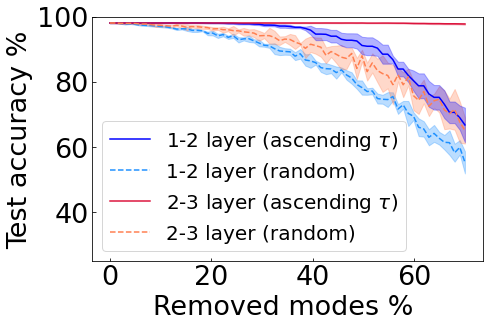

In [32]:
x = np.linspace(0,70,70)
plt.figure(figsize=(7.0,4.5))
plt.plot(x,mean3,color="blue",label=r"1-2 layer (ascending $\tau$)")
plt.plot(x,mean1,color = "dodgerblue",linestyle = '--',label=r"1-2 layer (random)")
plt.plot(x,mean4,color="crimson",label = r'2-3 layer (ascending $\tau$)')
plt.plot(x,mean2,color = "coral" ,linestyle = '--',label=r"2-3 layer (random)")
plt.fill_between(x,mean1-std1,mean1+std1,color = "dodgerblue",alpha=0.3)
plt.fill_between(x,mean2-std2,mean2+std2,color = "coral",alpha=0.3)
plt.fill_between(x,mean3-std3,mean3+std3,color = "blue",alpha=0.3)
plt.fill_between(x,mean4-std4,mean4+std4,color = "crimson",alpha=0.3)
plt.xlabel(r"Removed modes % ",fontsize=27)
plt.ylabel("Test accuracy %",fontsize=27)
plt.tick_params(labelsize=27,direction='in')
plt.legend(fontsize=20,loc = 'lower left')
plt.ylim(25,100)
# plt.plot(result_ran[2][0])
plt.savefig('fig4/fig44.pdf',dpi=900,bbox_inches='tight')
